In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_fscore_support, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, log_loss
from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from collections import Counter


Abrir el archivo y cargar los datos de interes en listas

In [45]:
corpus=[]
target=[]
edad=[]
sexo=[]
severidad=[]
archivo=open("dataset_elpino.csv",encoding="utf-8")
header=archivo.readline().strip().split(";")
features=[]
for col in header:
    col=col.split("-")[0].strip()
    if col.startswith("Diag") or col.startswith("Proc"):
        col=col.split(" ")
        col=col[0]+col[1]
    features.append(col)
for linea in archivo:
    row=[]
    linea=linea.strip().split(";")
    for i in range(len(linea)):
        col=linea[i].split("-")[0].strip()
        if i==67:
            grd=col
            target.append(grd)
            ultimoDigito=grd[5]
            severidad.append(ultimoDigito)
        elif i==66:
            sexo.append(0 if col=="Mujer" else 1)
        elif i==65:
            edad.append(int(col))
        else:
            row.append(col)
    corpus.append(row)

In [18]:
corpus[0]

['A41.8',
 'B37.6',
 'I39.8',
 'N10',
 'B96.1',
 'L89.9',
 'L08.9',
 'B96.2',
 'A41.5',
 'J86.9',
 'U07.1',
 'Y95',
 'N18.5',
 'E87.1',
 'D64.9',
 'G82.2',
 'N31.9',
 'I10',
 'K70.4',
 'F19.2',
 'F10.2',
 'E46',
 'G40.9',
 'L21.9',
 'Z93.5',
 'Z93.3',
 'Z99.2',
 'Z91.6',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '86.28',
 '34.91',
 '88.38',
 '87.41',
 '88.75',
 '88.01',
 '88.43',
 '88.41',
 '87.44',
 '99.29',
 '99.19',
 '99.18',
 '99.21',
 '99.26',
 '99.23',
 '93.94',
 '89.52',
 '90.59',
 '89.65',
 '39.95',
 '39.95',
 '99.04',
 '90.39',
 '99.84',
 '88.72',
 '90.42',
 '90.52',
 '91.39',
 '91.33',
 '87.03']

In [84]:
features

['Diag01',
 'Diag02',
 'Diag03',
 'Diag04',
 'Diag05',
 'Diag06',
 'Diag07',
 'Diag08',
 'Diag09',
 'Diag10',
 'Diag11',
 'Diag12',
 'Diag13',
 'Diag14',
 'Diag15',
 'Diag16',
 'Diag17',
 'Diag18',
 'Diag19',
 'Diag20',
 'Diag21',
 'Diag22',
 'Diag23',
 'Diag24',
 'Diag25',
 'Diag26',
 'Diag27',
 'Diag28',
 'Diag29',
 'Diag30',
 'Diag31',
 'Diag32',
 'Diag33',
 'Diag34',
 'Diag35',
 'Proced01',
 'Proced02',
 'Proced03',
 'Proced04',
 'Proced05',
 'Proced06',
 'Proced07',
 'Proced08',
 'Proced09',
 'Proced10',
 'Proced11',
 'Proced12',
 'Proced13',
 'Proced14',
 'Proced15',
 'Proced16',
 'Proced17',
 'Proced18',
 'Proced19',
 'Proced20',
 'Proced21',
 'Proced22',
 'Proced23',
 'Proced24',
 'Proced25',
 'Proced26',
 'Proced27',
 'Proced28',
 'Proced29',
 'Proced30',
 'Edad en años',
 'Sexo (Desc)',
 'GRD']

Aquí definimos el data frame

In [46]:
df=pd.DataFrame(corpus,columns=features[:-3])
df["Edad"]=edad
df["Sexo"]=sexo
df["GRD"]=target
df["Severidad"]=severidad

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 69 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diag01     14561 non-null  object
 1   Diag02     14561 non-null  object
 2   Diag03     14561 non-null  object
 3   Diag04     14561 non-null  object
 4   Diag05     14561 non-null  object
 5   Diag06     14561 non-null  object
 6   Diag07     14561 non-null  object
 7   Diag08     14561 non-null  object
 8   Diag09     14561 non-null  object
 9   Diag10     14561 non-null  object
 10  Diag11     14561 non-null  object
 11  Diag12     14561 non-null  object
 12  Diag13     14561 non-null  object
 13  Diag14     14561 non-null  object
 14  Diag15     14561 non-null  object
 15  Diag16     14561 non-null  object
 16  Diag17     14561 non-null  object
 17  Diag18     14561 non-null  object
 18  Diag19     14561 non-null  object
 19  Diag20     14561 non-null  object
 20  Diag21     14561 non-null  o

In [42]:
df["GRD"].value_counts()[:30]

GRD
146101    813
146121    639
146131    538
158171    389
134161    325
071141    317
044153    287
061131    252
041023    248
146102    244
044163    229
131111    226
131201    222
054123    204
146122    187
146103    163
061201    154
044183    145
146132    140
131301    139
114121    136
044213    135
094131    134
041203    130
071142    129
214121    123
014241    121
114123    118
091401    115
064181    104
Name: count, dtype: int64

In [6]:
len(df['GRD'].unique())

526

In [7]:
df.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


Gráfico de barras de completitud NO tomando las casillas vacias como nan

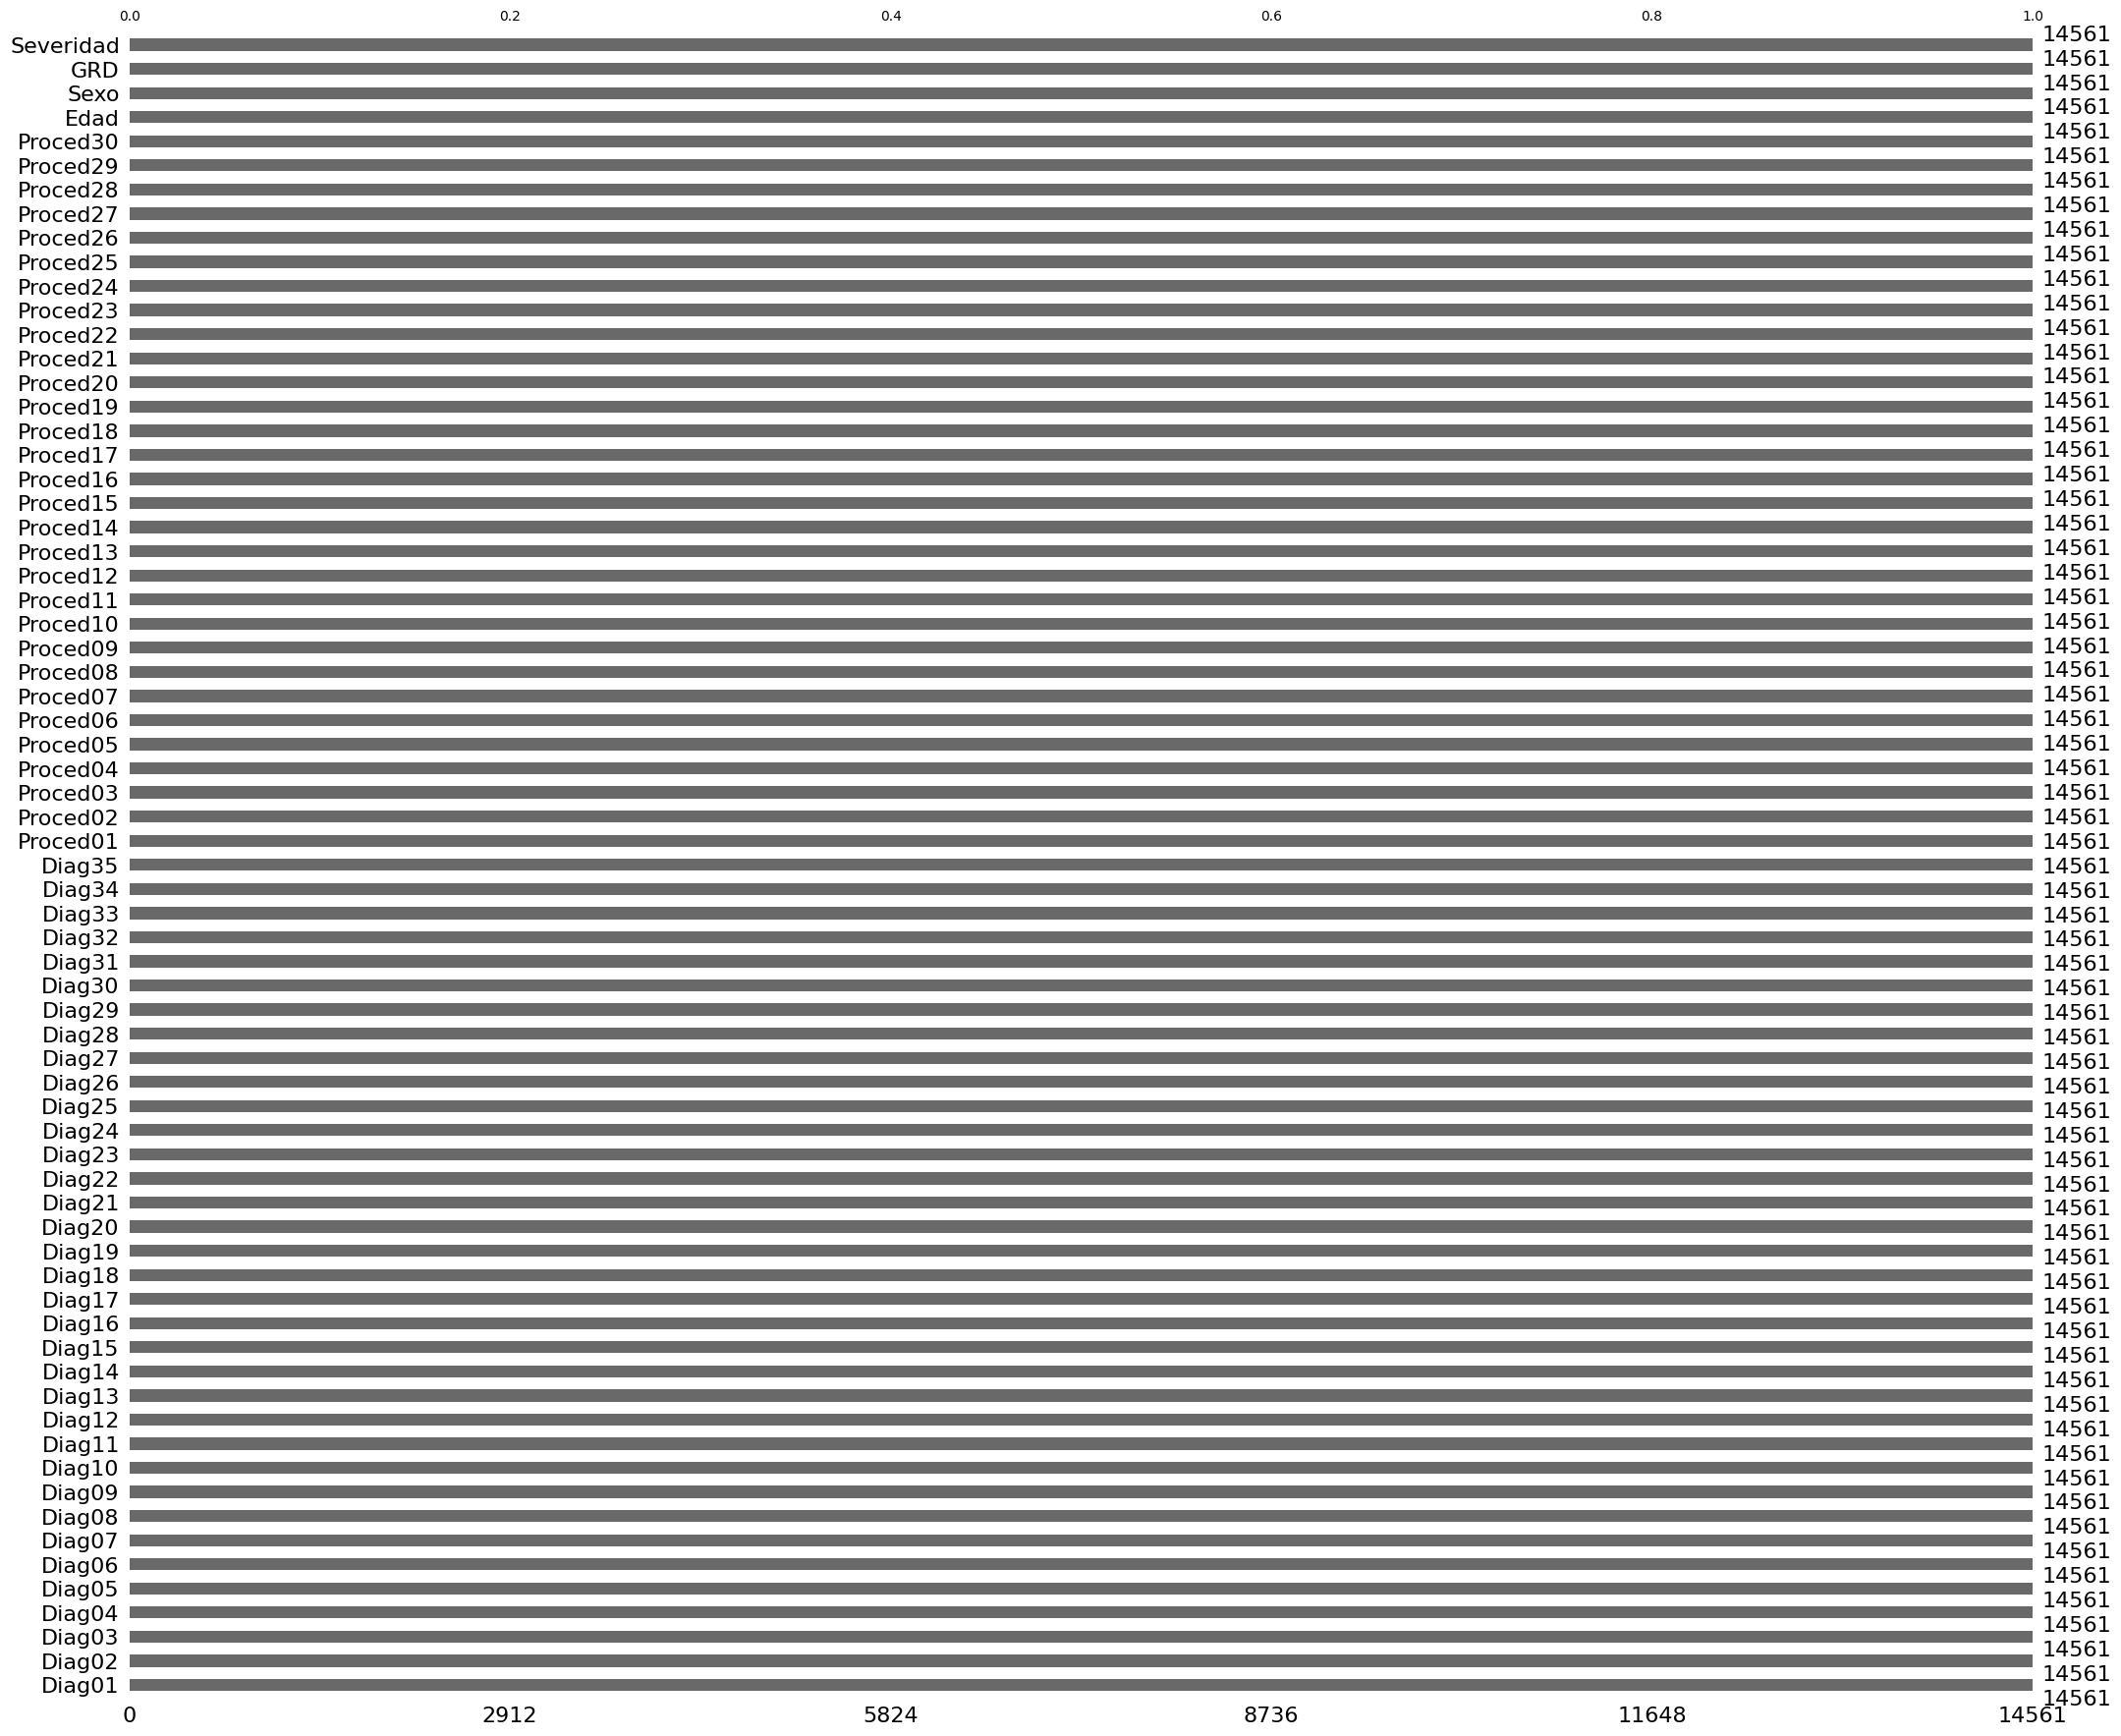

In [ ]:
msno.bar(df)

plt.show()

In [49]:
df = df.replace(r'^\s*$', np.nan, regex=True)

Graficó de barras de completitud tomando las casillas vacias como nan

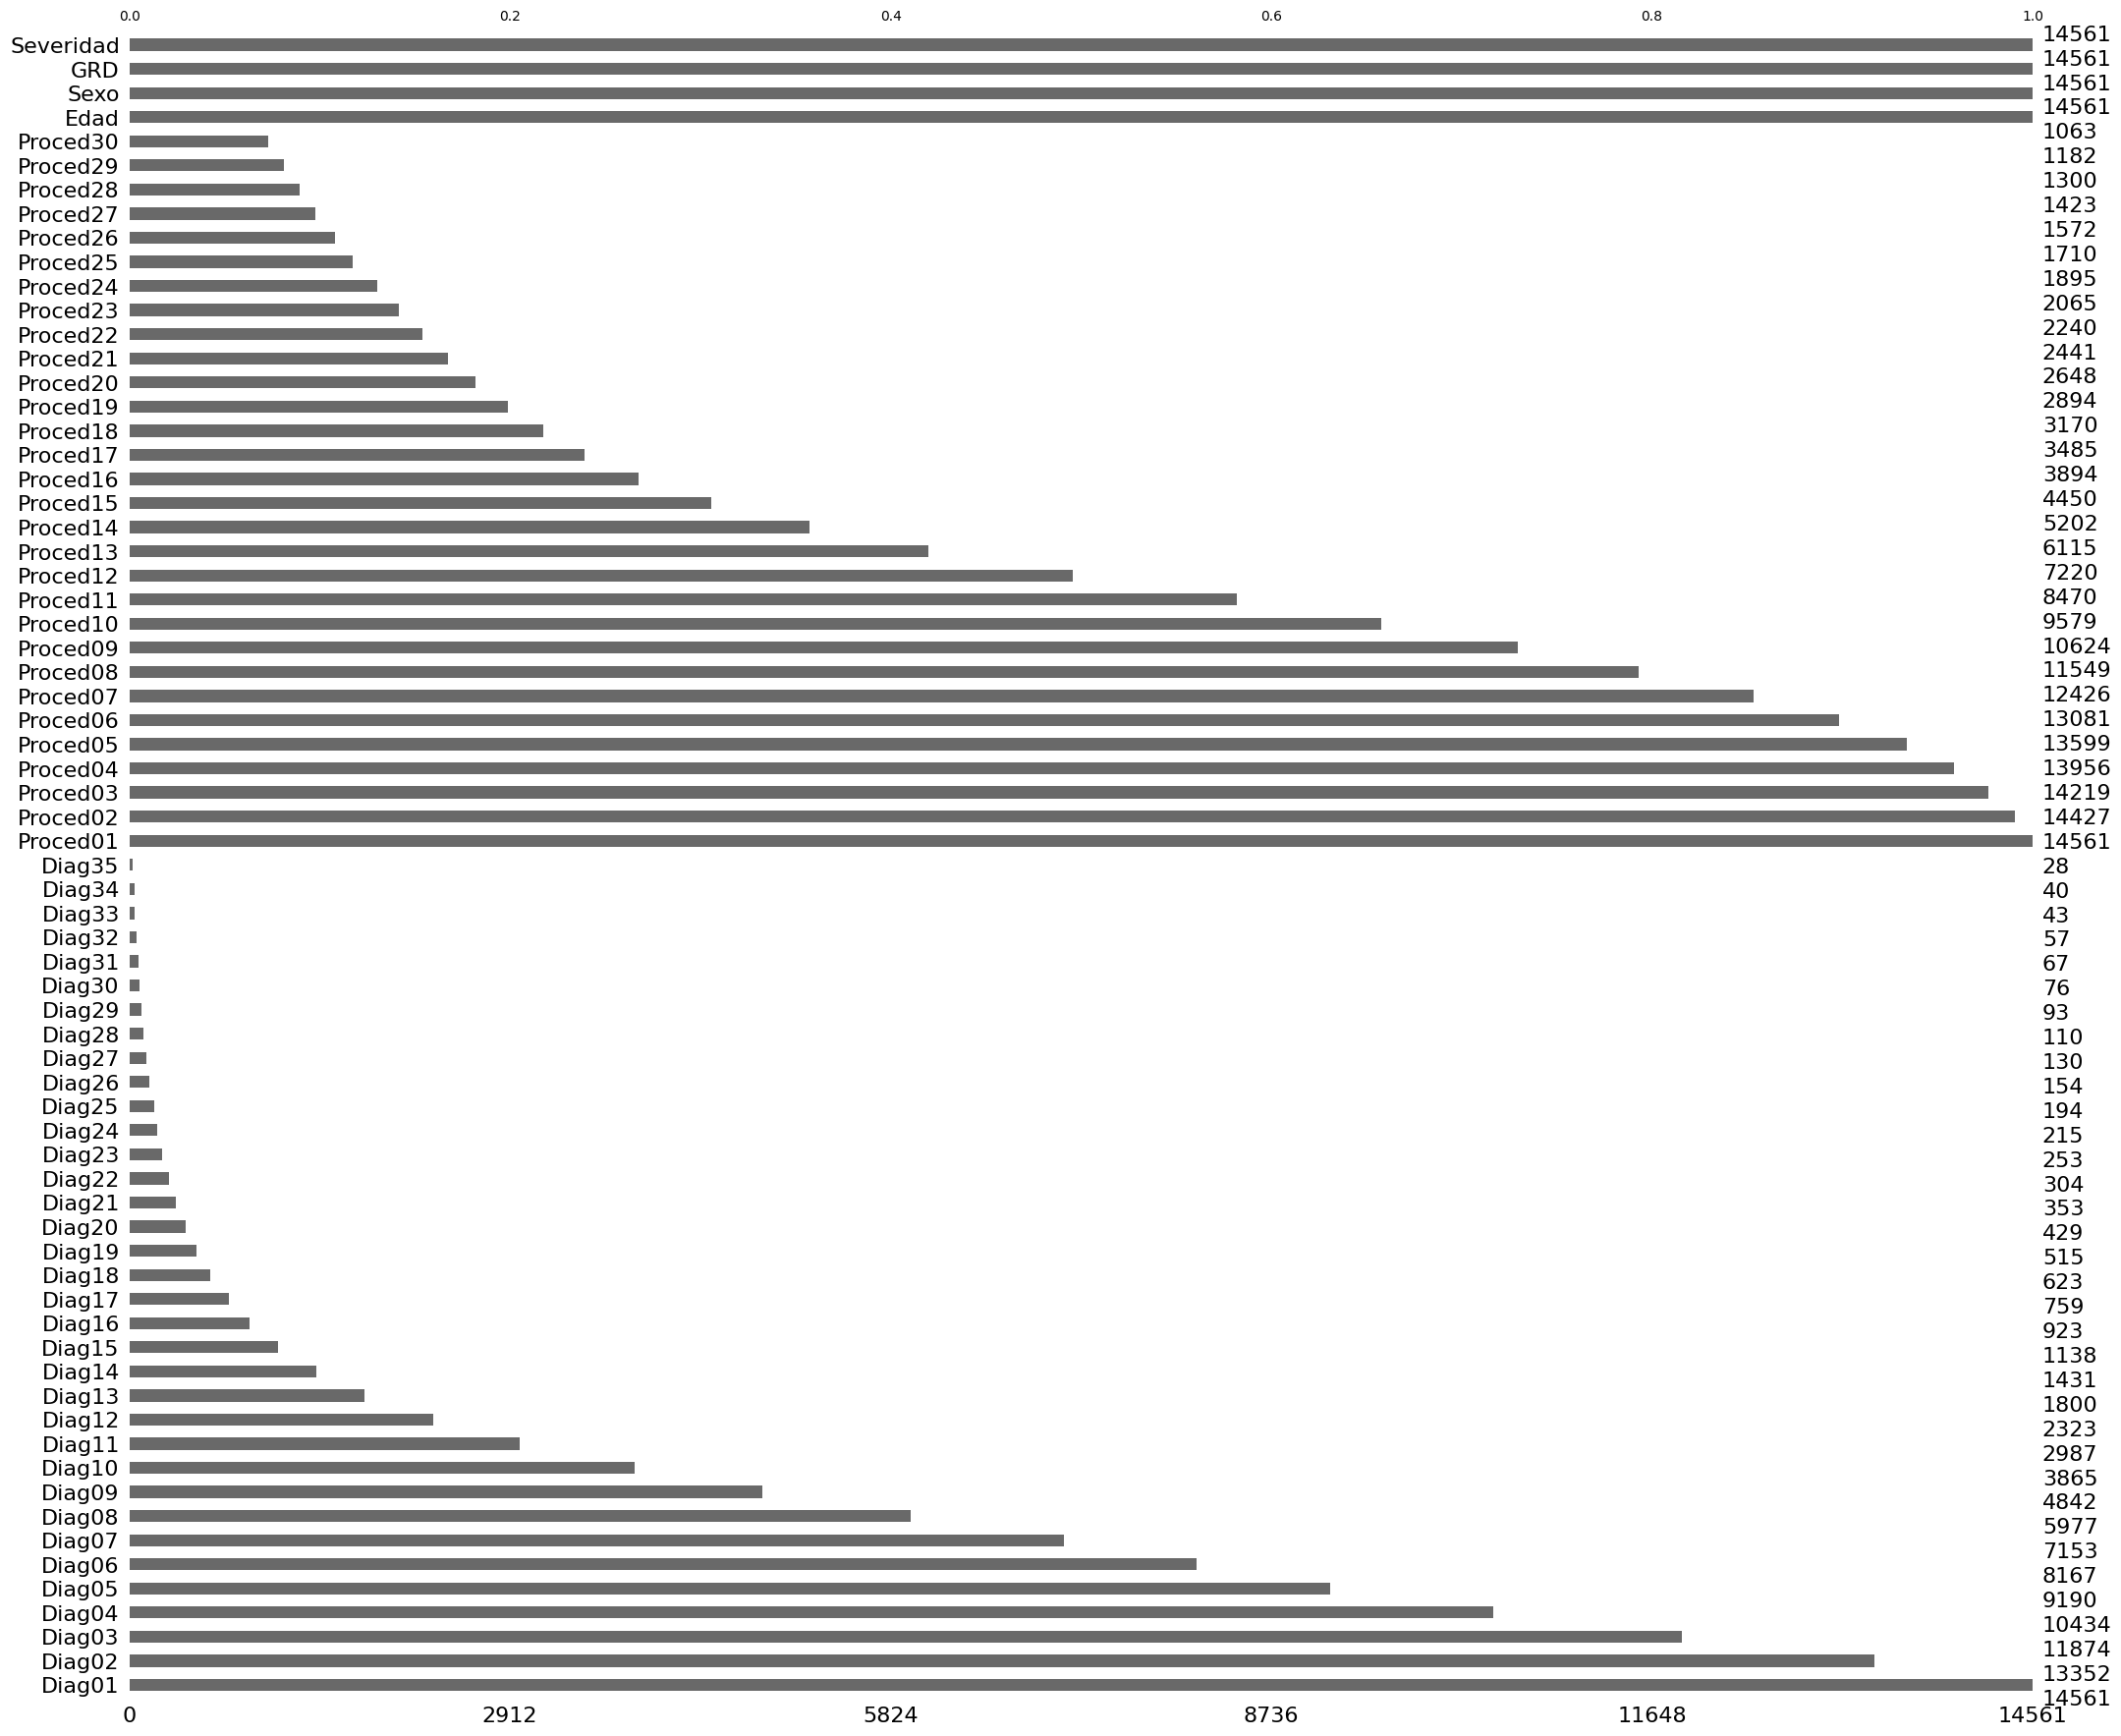

In [ ]:
msno.bar(df)

plt.show()

Preparación para correctitud

In [ ]:
#Convertir tipos de dato
df['Severidad'] = pd.to_numeric(df['Severidad'], errors='coerce')
df['GRD'] = df['GRD'].astype(str).str.strip().str.zfill(6)
#Cargar Excels
catalogoGRD = pd.read_excel('Tablas maestras bases GRD.xlsx',sheet_name='IR - GRD',header=None)
catalogoGRD[0] = catalogoGRD[0].astype(str).str.strip().str.zfill(6)
catalogoGRD = catalogoGRD[catalogoGRD[0].notnull()]

catalogoProced = pd.read_excel('CIE-9.xlsx')
catalogoProced['Código'] = catalogoProced['Código'].astype(str).str.strip().str.zfill(6)
catalogoProced = catalogoProced[catalogoProced['Código'].notnull()]

catalogoDiag = pd.read_excel('CIE-10.xlsx')
catalogoDiag['Código'] = catalogoDiag['Código'].astype(str).str.strip().str.zfill(6)
catalogoDiag = catalogoDiag[catalogoDiag['Código'].notnull()]

#Obtiene lista de válidos
codigos_validos_GRD = catalogoGRD[0].unique()
codigos_validos_Proced = catalogoProced['Código'].unique()
codigos_validos_Diag = catalogoDiag['Código'].unique()
print(codigos_validos_GRD)
print(codigos_validos_Proced)
print(codigos_validos_Diag)

# Columnas de diagnóstico y procedimiento
diag_cols = [f'Diag{str(i).zfill(2)}' for i in range(1, 36)]
proced_cols = [f'Proced{str(i).zfill(2)}' for i in range(1, 31)]

# Filtros válidos: todos los valores deben estar en la lista o ser NaN
filtro_diag = df[diag_cols].applymap(lambda x: pd.isna(x) or x in codigos_validos_Diag).all(axis=1)
filtro_proced = df[proced_cols].applymap(lambda x: pd.isna(x) or x in codigos_validos_Proced).all(axis=1)

['IR- GRD' '011011' '011012' ... '990119' '990129' '990149']
['0000.0' '000.01' '000.02' ... '099.97' '099.98' '099.99']
['000A00' '0A00.0' '0A00.1' ... '0Z99.4' '0Z99.8' '0Z99.9']


C:\Users\junit\AppData\Local\Temp\ipykernel_9532\1536584021.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_diag = df[diag_cols].applymap(lambda x: pd.isna(x) or x in codigos_validos_Diag).all(axis=1)
C:\Users\junit\AppData\Local\Temp\ipykernel_9532\1536584021.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_proced = df[proced_cols].applymap(lambda x: pd.isna(x) or x in codigos_validos_Proced).all(axis=1)


In [53]:
#Análisis de correctitud de los datos
edad_valida = df[df['Edad'].between(0, 122)]
sexo_valido =df[df['Sexo'].between(0, 1)]
severidad_valida = df[df['Severidad'].between(0, 3)]
GRD_valido = df[df['GRD'].isin(codigos_validos_GRD)]

#Registros con Diag y Proced
diag_valido = df[~filtro_diag]
proced_valido = df[~filtro_proced]

Filtros aplicados al data frame

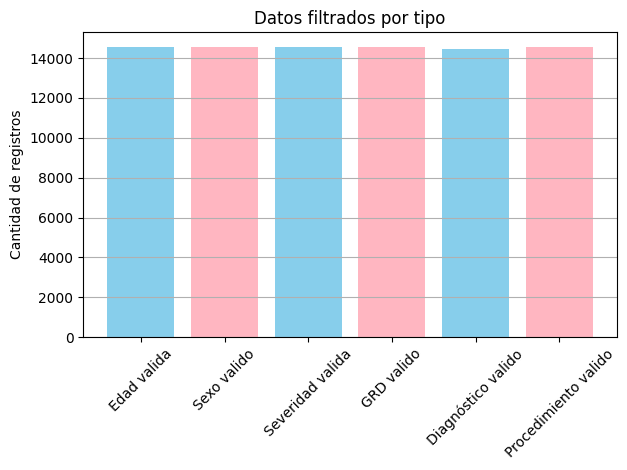

In [54]:
filtrados = {
    'Edad valida': len(edad_valida),
    'Sexo valido': len(sexo_valido),
    'Severidad valida': len(severidad_valida),
    'GRD valido': len(GRD_valido),
    'Diagnóstico valido': len(diag_valido),
    'Procedimiento valido': len(proced_valido)
}

colores = ['skyblue', 'lightpink', 'skyblue', 'lightpink', 'skyblue', 'lightpink']

plt.bar(filtrados.keys(), filtrados.values(), color=colores)
plt.title('Datos filtrados por tipo')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Filtramos los GRDs para quedarnos solo con los que tengan más de 100 casos dentro del dataset del hospital el pino

In [47]:
grds=df["GRD"].value_counts()
grdFiltro = grds[grds>100].index.tolist() # Filtramos los GRDS que tienen más de 100 casos y lo trasformamos en una lista de los que son
grdFiltro

['146101',
 '146121',
 '146131',
 '158171',
 '134161',
 '071141',
 '044153',
 '061131',
 '041023',
 '146102',
 '044163',
 '131111',
 '131201',
 '054123',
 '146122',
 '146103',
 '061201',
 '044183',
 '146132',
 '131301',
 '114121',
 '044213',
 '094131',
 '041203',
 '071142',
 '214121',
 '014241',
 '114123',
 '091401',
 '064181',
 '114122',
 '146123']

In [23]:
len(grdFiltro)

32

In [24]:
dfFiltro=df[df["GRD"].isin(grdFiltro)] # Filtramos con la lista GRDS que tengan mas de 100 casos
dfFiltro.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,1,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,1,041023
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.04,99.18,99.19,99.21,99.26,99.29,93.01,37,0,041023
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,99.26,99.29,93.01,93.09,93.11,93.12,93.13,59,1,041023
14,N17.0,K80.3,U07.1,J96.09,I48.0,R57.0,A41.8,B96.1,Y95,U82.2,...,88.01,88.43,87.03,88.38,87.44,45.13,45.23,77,0,041023


In [25]:
dfFiltro["GRD"].value_counts().sum()

np.int64(7310)

In [26]:
df["GRD"].value_counts().sum()

np.int64(14561)

Gráfico de barras que muestra la distribucion de las edades en el df

<Axes: xlabel='Edad'>

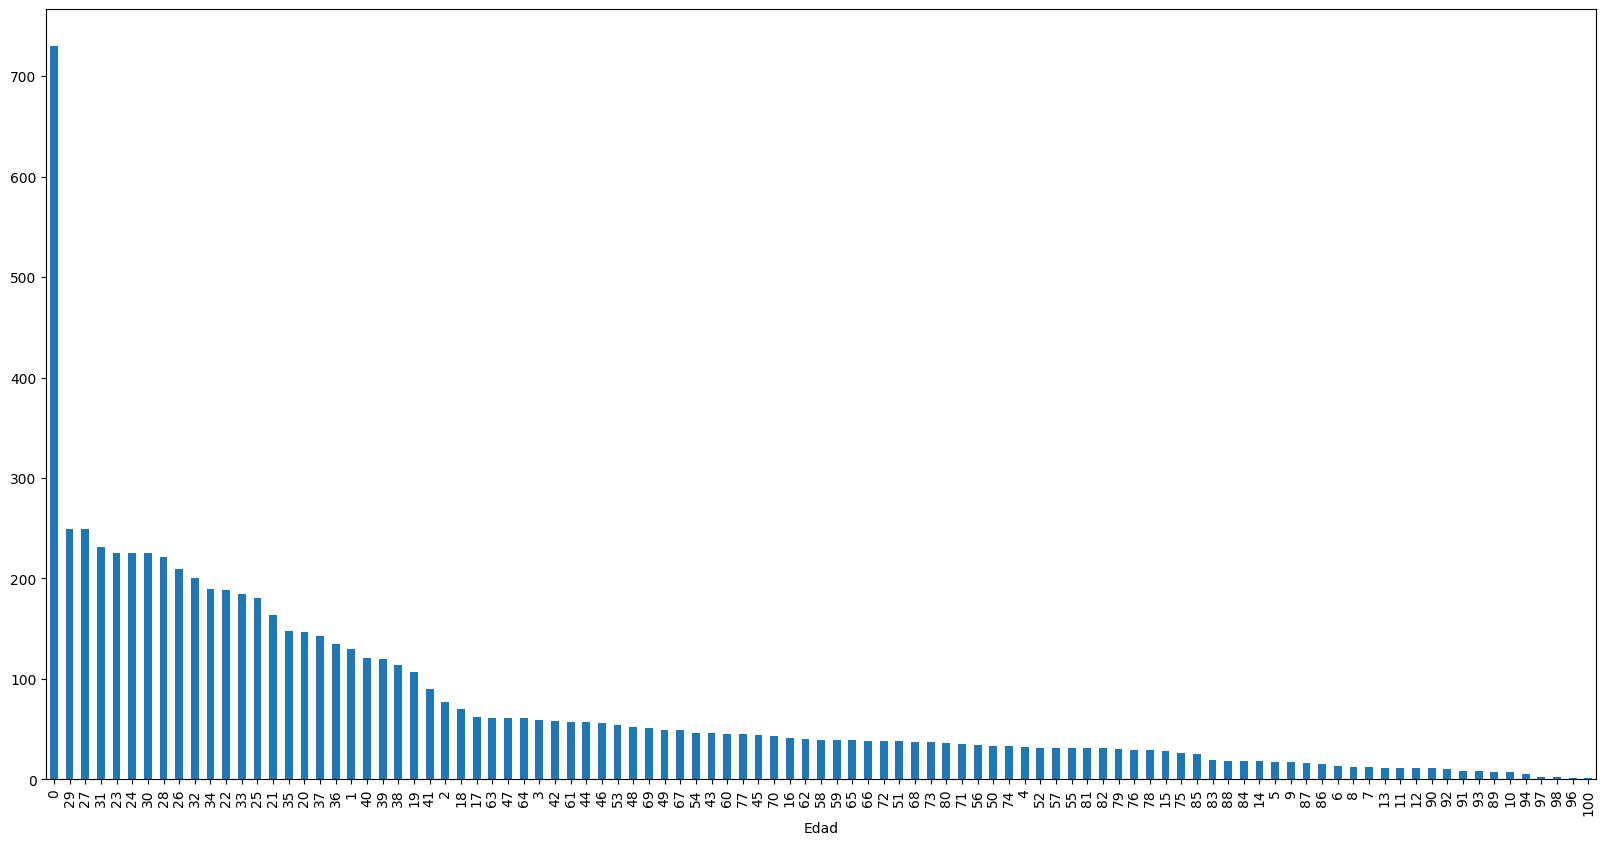

In [27]:
dfFiltro["Edad"].value_counts().plot(kind="bar", figsize=(20, 10))

Gráfico de barras con la distribución de las edad 1 = Hombre y 0 = Mujer

<Axes: xlabel='Sexo'>

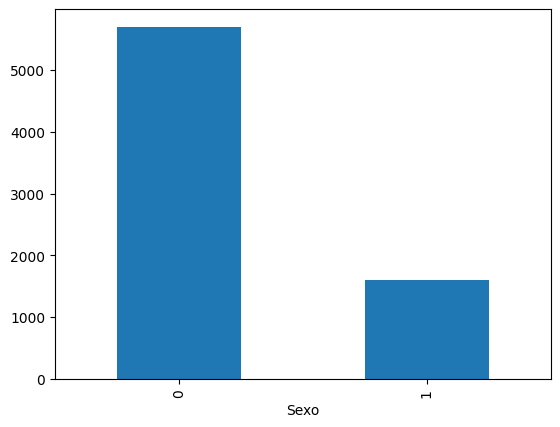

In [28]:
dfFiltro["Sexo"].value_counts().plot(kind="bar")

Contar diagnosticos y procedimientos de cada caso, también grafico de diagnosticos más frecuentes

<Axes: >

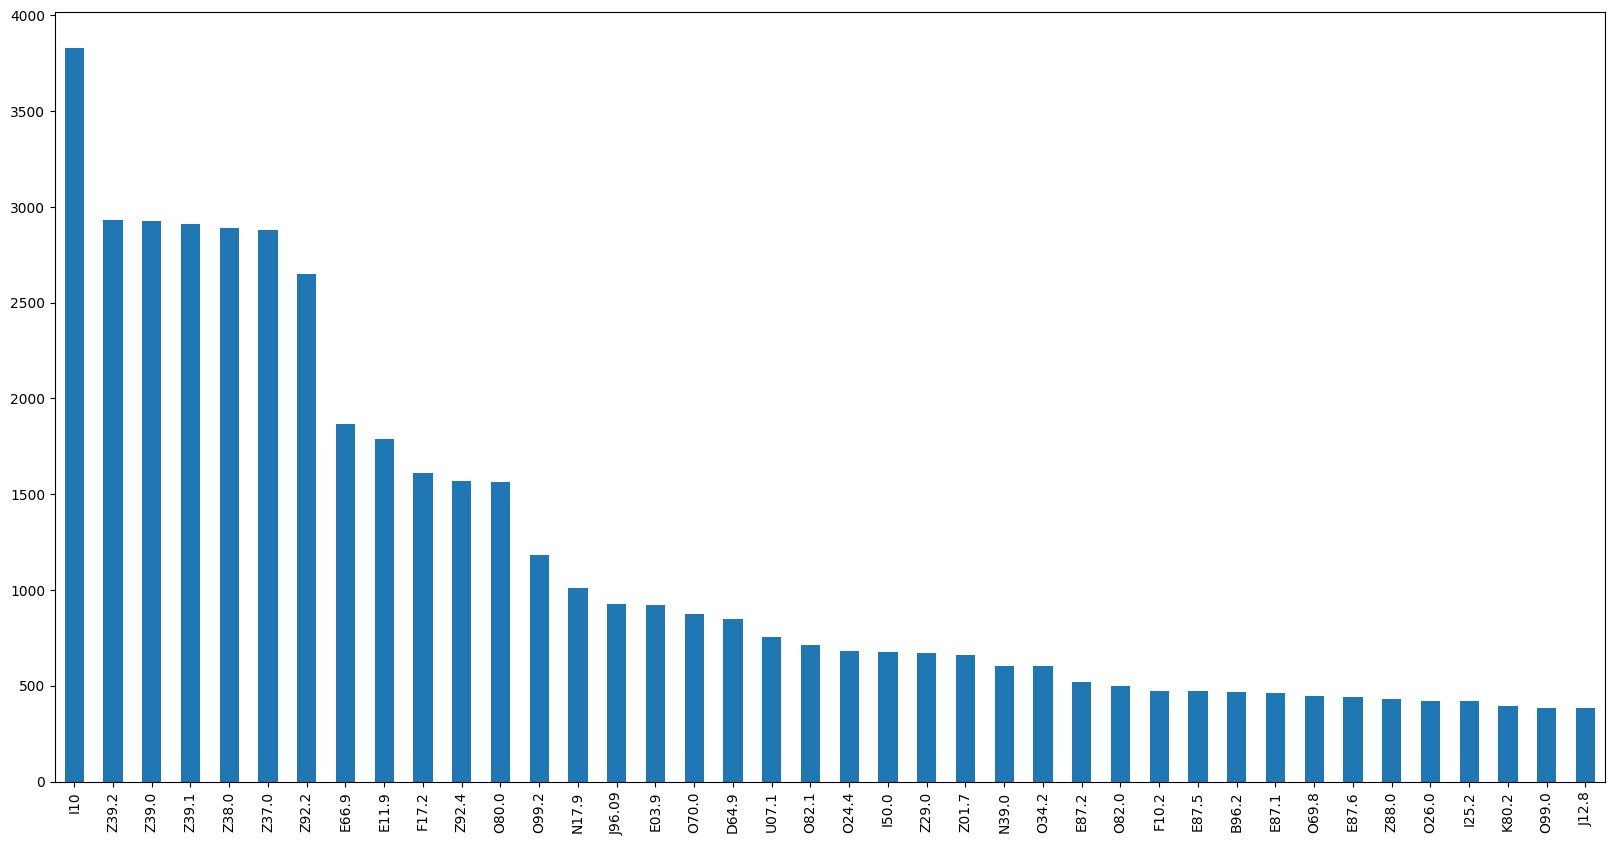

In [29]:
# Columnas de diagnóstico y procedimiento
diag_cols = [f'Diag{i:02d}' for i in range(1, 36)]  # Diag01 a Diag35
proc_cols = [f'Proced{i:02d}' for i in range(1, 31)]  # Proc01 a Proc30
# Diagnosticos con más frecuencia
conteo_diag = pd.Series(df[diag_cols].values.ravel()).loc[lambda row: (row != '') & (row != 0)]. value_counts()
conteo_diag.head(40).plot(kind='bar', figsize=(20, 10))

Procediminetos más frecuentes

<Axes: >

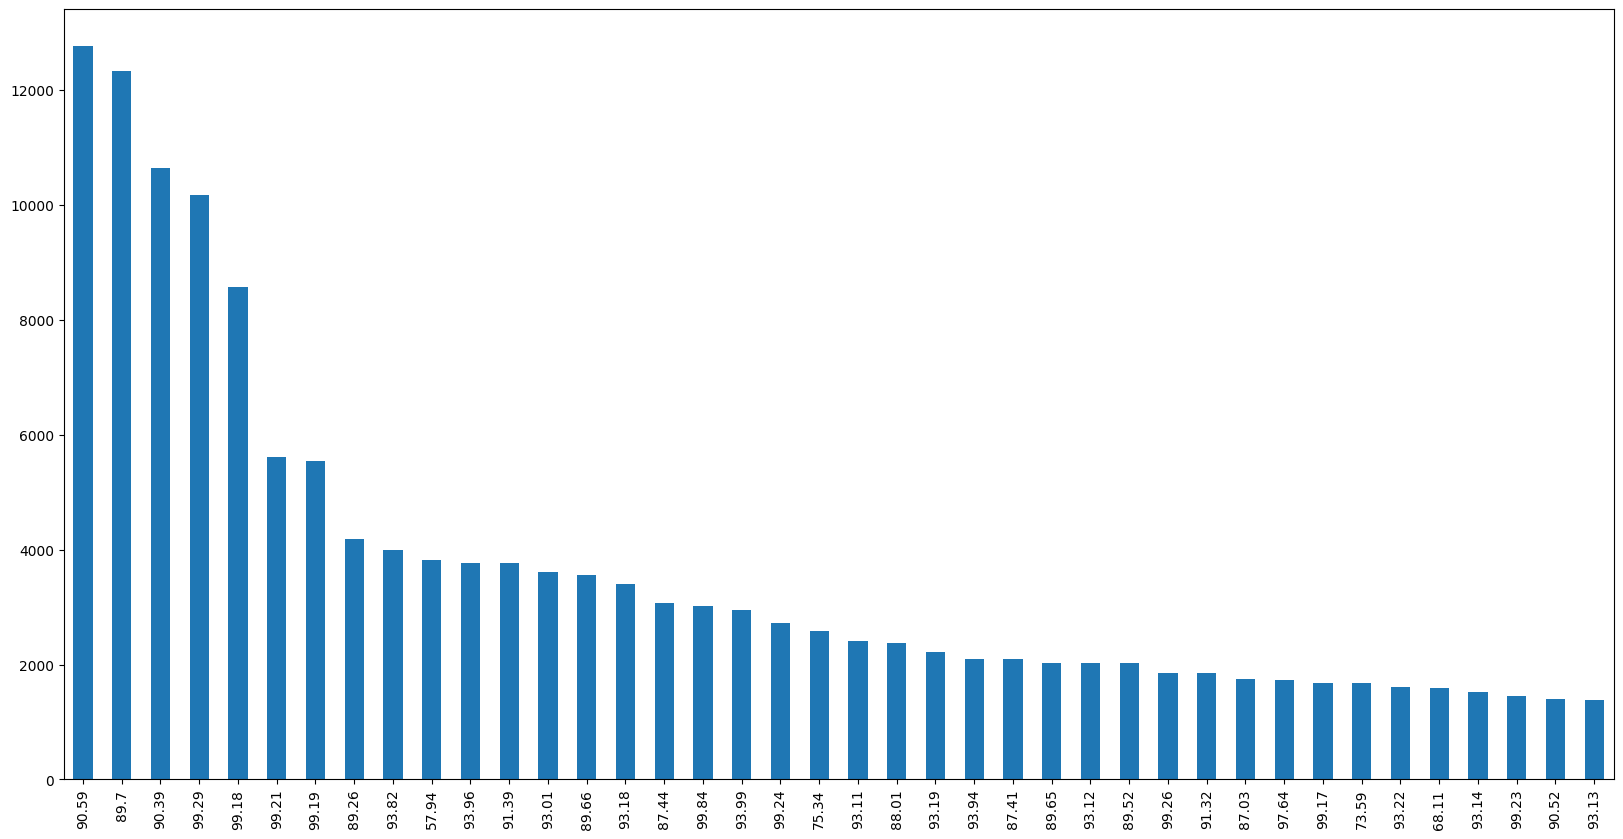

In [ ]:
conteo_proc= pd.Series(df[proc_cols].values.ravel()).loc[lambda row: (row != '') & (row != 0)]. value_counts()
conteo_proc.head(40).plot(kind='bar', figsize=(20, 10))

Añadimos las columnas con numero de diagnosticos 'num_diag' y también el numero de procediminetos 'num_proc'

In [31]:
# Contar solo si el valor no es nulo, ni vacío, ni 0
dfFiltro['num_diag'] = dfFiltro[diag_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)
dfFiltro['num_proc'] = dfFiltro[proc_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)

C:\Users\junit\AppData\Local\Temp\ipykernel_9532\382793347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltro['num_diag'] = dfFiltro[diag_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)
C:\Users\junit\AppData\Local\Temp\ipykernel_9532\382793347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltro['num_proc'] = dfFiltro[proc_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)


In [32]:
dfFiltro.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD,num_diag,num_proc
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,00.17,99.04,99.18,99.21,99.23,61,1,041023,19,30
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,91.32,93.90,99.15,96.59,45.13,30,1,041023,22,30
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.19,99.21,99.26,99.29,93.01,37,0,041023,21,30
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,93.01,93.09,93.11,93.12,93.13,59,1,041023,22,30
14,N17.0,K80.3,U07.1,J96.09,I48.0,R57.0,A41.8,B96.1,Y95,U82.2,...,87.03,88.38,87.44,45.13,45.23,77,0,041023,14,30


Numero de diagnosticos por caso con más frecuencia

<Axes: xlabel='num_diag'>

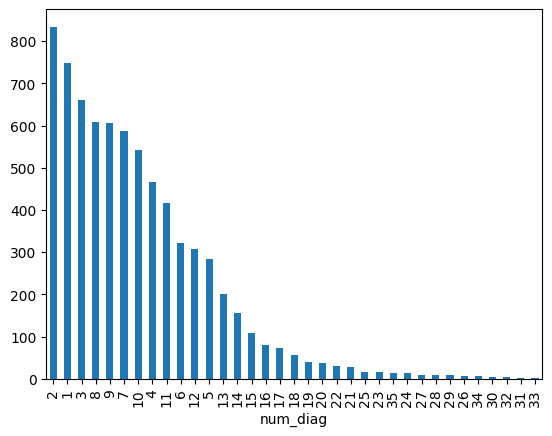

In [ ]:
dfFiltro["num_diag"].value_counts().plot(kind="bar")

Numero de procedimientos por caso con más frecuencia

<Axes: xlabel='num_proc'>

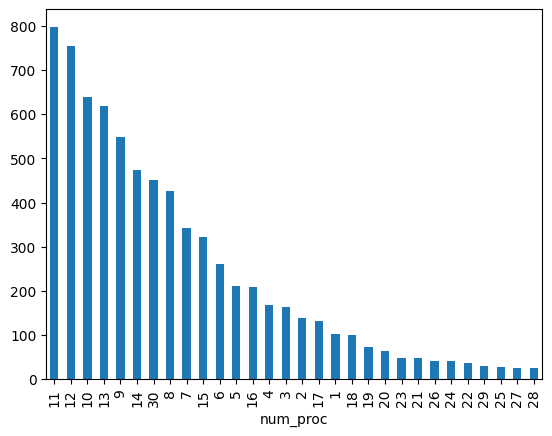

In [ ]:
dfFiltro["num_proc"].value_counts().plot(kind="bar")

In [35]:
pd.crosstab(dfFiltro["GRD"],dfFiltro["Diag01"],margins=True)

Diag01,A02.0,A04.7,A04.9,A06.0,A09.9,A15.0,A15.3,A15.6,A18.4,A37.0,...,Z35.3,Z35.4,Z43.0,Z43.2,Z43.3,Z59.7,Z60.8,Z65.3,Z76.2,All
GRD,,,,,,,,,,,,,,,,,,,,,
014241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,121
041023,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,248
041203,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130
044153,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,287
044163,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,229
044183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,145
044213,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,135
054123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,204
061131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,252


In [36]:
data=dfFiltro

In [37]:
data

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD,num_diag,num_proc
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,00.17,99.04,99.18,99.21,99.23,61,1,041023,19,30
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,91.32,93.90,99.15,96.59,45.13,30,1,041023,22,30
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.19,99.21,99.26,99.29,93.01,37,0,041023,21,30
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,93.01,93.09,93.11,93.12,93.13,59,1,041023,22,30
14,N17.0,K80.3,U07.1,J96.09,I48.0,R57.0,A41.8,B96.1,Y95,U82.2,...,87.03,88.38,87.44,45.13,45.23,77,0,041023,14,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,N10,N13.3,F14.2,F17.9,F10.9,R63.4,Z03.0,Z59.0,Z88.6,,...,,,,,,42,0,114121,9,9
14548,K80.2,I10,Z92.2,,,,,,,,...,,,,,,57,0,071141,3,8
14552,K35.8,Z88.1,,,,,,,,,...,,,,,,23,0,061131,2,12
14553,O23.1,O23.5,,,,,,,,,...,,,,,,26,0,134161,2,10


Generamos los las características para los 35 posibles diagnosticos y los 35 posibles procedimientos

In [38]:
features_procedimientos=[]
features_diagnosticos=[]
for j in range(1,36):
    field="Diag"+str(j).zfill(2)
    features_diagnosticos.append(field)
for j in range(1,31):
    field="Proced"+str(j).zfill(2)
    features_procedimientos.append(field)

Generamos el diccionario con los datos 

In [39]:
procedimientos={}
diagnosticos={}
for i, row in data.iterrows():
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        if row[field] not in diagnosticos:
            diagnosticos[row[field]]=1
        else:
            diagnosticos[row[field]]+=1
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        if row[field] not in procedimientos:
            procedimientos[row[field]]=1
        else:
            procedimientos[row[field]]+=1
token_diagnosticos=list(diagnosticos.keys())
token_procedimientos=list(procedimientos.keys())
vocabulario=len(token_diagnosticos)+len(token_procedimientos)+1
print("Diagnósticos: ",len(token_diagnosticos))
print("Procedimientos: ",len(token_procedimientos))
print("Vocabulario: ",vocabulario)

Diagnósticos:  2199
Procedimientos:  545
Vocabulario:  2745


Tokens normal

In [134]:
token_rows=[]
for i, row in data.iterrows():
    token_row=[]
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        token_row.append(1+token_diagnosticos.index(row[field]))
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        token_row.append(1+len(token_diagnosticos)+token_procedimientos.index(row[field]))
    token_rows.append(token_row)


Tokens con importancia de diagnostico principal y procedimiento principal

In [15]:
token_rows = []
for i, row in data.iterrows():
    token_row = []
    # 1. Añadir Diag01 (principal)
    token_row.append(1 + token_diagnosticos.index(row["Diag01"]))
    # 2. Añadir resto de diagnósticos (secundarios)
    for j in range(2, 36):
        field = f"Diag{str(j).zfill(2)}"
        token_row.append(1 + token_diagnosticos.index(row[field]))
    # 3. Añadir Proced01 (principal)
    token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(row["Proced01"]))
    # 4. Añadir resto de procedimientos (secundarios)
    for j in range(2, 31):
        field = f"Proced{str(j).zfill(2)}"
        token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(row[field]))

    token_row.append(row["Edad"])
    token_row.append(1 if row["Sexo"] == "M" else 0)
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])

    token_rows.append(token_row)

Tokens base + edad, sexo, num_diag y num_proced

In [481]:
token_rows = []
for i, row in data.iterrows():
    token_row = []

    # Tokenización diagnósticos
    for j in range(1, 36):
        field = f"Diag{str(j).zfill(2)}"
        valor = row[field]
        if pd.notnull(valor):
            token_row.append(1 + token_diagnosticos.index(valor))
        else:
            token_row.append(0)

    # Tokenización procedimientos
    for j in range(1, 31):
        field = f"Proced{str(j).zfill(2)}"
        valor = row[field]
        if pd.notnull(valor):
            token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(valor))
        else:
            token_row.append(0)

    # Variables adicionales
    token_row.append(row["Edad"])
    token_row.append(1 if row["Sexo"] == "M" else 0)
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])

    token_rows.append(token_row)


Tokens sin diagnosticos y sin procedimientos

In [ ]:
token_rows = []
for i, row in data.iterrows():
    token_row = []
    token_row.append(row['Edad'])
    token_row.append(1 if row["Sexo"] == "M" else 0)
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])
    token_rows.append(token_row)

Random Forest

In [463]:
X = pd.DataFrame(token_rows)
y = data["GRD"]

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [465]:
le = LabelEncoder()
y = le.fit_transform(data["GRD"])


Matriz de confusión de random forest

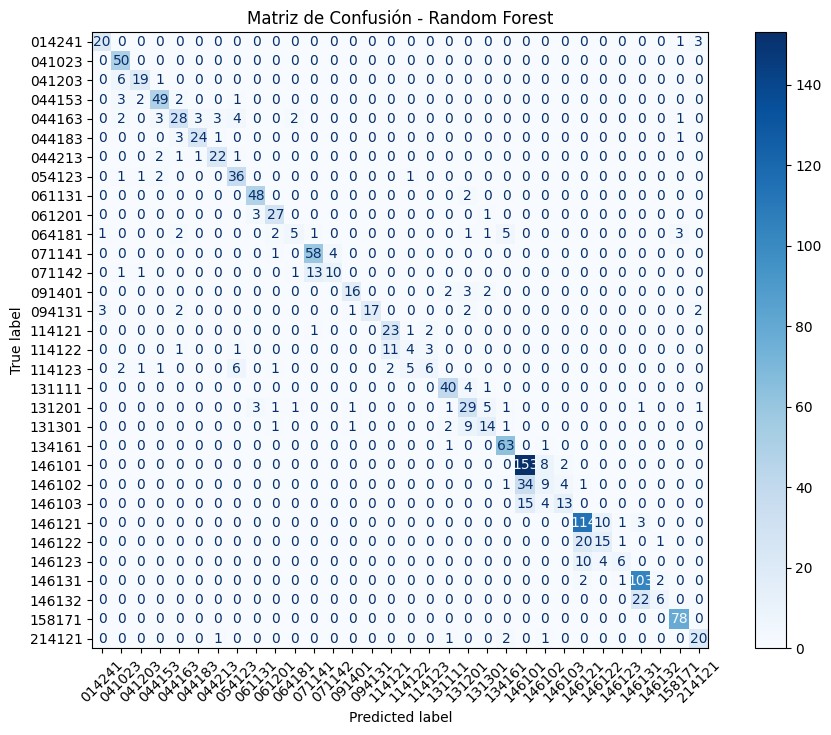

In [479]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Crear figura con tamaño personalizado
fig, ax = plt.subplots(figsize=(12, 8))

# Mostrar la matriz en ese ax
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)

plt.title("Matriz de Confusión - Random Forest")
plt.show()



MAE y MSE del modelo

In [443]:
y_pred = rf.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 23052.1121751026
MSE: 1763630950.9124486


Reporte de que tan bien predijo el modelo por cada clase

In [ ]:
# Predicciones
y_pred = rf.predict(X_test)

# Reporte general
print(classification_report(y_test, y_pred))

# Precisión, Recall, F1 (micro)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='micro'
)
print(f"Precision (micro): {precision:.3f}")
print(f"Recall (micro): {recall:.3f}")
print(f"F1-score (micro): {f1:.3f}")

# Obtener las probabilidades predichas
y_pred_probs = rf.predict_proba(X_test)

              precision    recall  f1-score   support

      014241       0.90      0.86      0.88        22
      041023       0.86      0.96      0.91        56
      041203       0.75      0.84      0.79        25
      044153       0.84      0.79      0.82        67
      044163       0.64      0.75      0.69        40
      044183       0.77      0.71      0.74        34
      044213       0.81      0.54      0.65        24
      054123       0.74      0.81      0.77        42
      061131       0.88      0.98      0.93        46
      061201       0.86      0.89      0.87        35
      064181       0.43      0.35      0.39        17
      071141       0.62      0.94      0.75        49
      071142       0.70      0.22      0.33        32
      091401       0.84      0.84      0.84        25
      094131       0.95      0.67      0.78        27
      114121       0.67      0.85      0.75        26
      114122       0.43      0.32      0.36        19
      114123       0.58    

In [ ]:
# Obtener las clases únicas (asegúrate de usar el encoder si corresponde)
classes = rf.classes_

# Probabilidades de predicción
y_pred_probs = rf.predict_proba(X_test)  # Esto devuelve una lista de arrays si hay más de 2 clases

# Binarizar etiquetas verdaderas
y_test_bin = label_binarize(y_test, classes=classes)


In [251]:
# Para modelos multicategoría se usa one-vs-rest por defecto
auc_micro = roc_auc_score(y_test_bin, y_pred_probs, average='micro', multi_class='ovr')
auc_macro = roc_auc_score(y_test_bin, y_pred_probs, average='macro', multi_class='ovr')

print("AUC micro:", auc_micro)
print("AUC macro:", auc_macro)


AUC micro: 0.8325567525904168
AUC macro: 0.7540644151512174


Division de datos para LSTM

In [16]:
X = np.array(token_rows)

# Codificar el GRD como etiquetas numéricas
le = LabelEncoder()
y = le.fit_transform(data['GRD'])  # y será un array de enteros (0 a n_classes-1)

y_cat = to_categorical(y, len(grdFiltro))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Over-sampling de datos

In [17]:
# 1. Contar muestras por GRD
counts = Counter(y)
print("Muestras por GRD antes de SMOTE:", counts)

# 2. Definir la estrategia de oversampling
# Queremos que las clases con <250 muestras lleguen a 300
sampling_strategy = {grp: 300 for grp in counts.keys() if counts[grp] < 250}

# 3. Aplicar SMOTE solo a las clases seleccionadas
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

# 4. Verificar el nuevo balance
new_counts = Counter(y_res)
print("Muestras por GRD después de SMOTE:", new_counts)

Muestras por GRD antes de SMOTE: Counter({np.int64(22): 813, np.int64(25): 639, np.int64(28): 538, np.int64(30): 389, np.int64(21): 325, np.int64(11): 317, np.int64(3): 287, np.int64(8): 252, np.int64(1): 248, np.int64(23): 244, np.int64(4): 229, np.int64(18): 226, np.int64(19): 222, np.int64(7): 204, np.int64(26): 187, np.int64(24): 163, np.int64(9): 154, np.int64(5): 145, np.int64(29): 140, np.int64(20): 139, np.int64(15): 136, np.int64(6): 135, np.int64(14): 134, np.int64(2): 130, np.int64(12): 129, np.int64(31): 123, np.int64(0): 121, np.int64(17): 118, np.int64(13): 115, np.int64(10): 104, np.int64(16): 103, np.int64(27): 101})
Muestras por GRD después de SMOTE: Counter({np.int64(22): 813, np.int64(25): 639, np.int64(28): 538, np.int64(30): 389, np.int64(21): 325, np.int64(11): 317, np.int64(1): 300, np.int64(7): 300, np.int64(23): 300, np.int64(17): 300, np.int64(27): 300, np.int64(19): 300, np.int64(29): 300, np.int64(24): 300, np.int64(20): 300, np.int64(15): 300, np.int64(9): 

Definición del modelo

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate

# Hiperparámetros
vocab_size = len(token_diagnosticos) + len(token_procedimientos) + 2  # + padding + offset
embedding_dim = 50
lstm_units = 65

# Entradas
inputs = Input(shape=(69,))  # Ahora estamos tomando 69 como el número de pasos de tiempo y 1 como las características por paso

# Capa de Embedding
embedding = Embedding(vocab_size, embedding_dim)(inputs)

# LSTM para procesar la secuencia
lstm_out = LSTM(lstm_units, return_sequences=True)(embedding)

# Atención al primer elemento (Diag01 y Proced01)
first_diag = lstm_out[:, 0, :]  # Salida del primer diagnóstico
first_proc = lstm_out[:, 35, :]  # Salida del primer procedimiento (posición 35)

# Concatenar features clave
combined = Concatenate()([first_diag, first_proc])

# Capa de salida para clasificación
output = Dense(len(grdFiltro), activation='softmax')(combined)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Entrenamiento del modelo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Cambiar el X_train y Y_train por _res para usar los datos con over-sampling
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test),
          callbacks = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True))

Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.1671 - loss: 3.1624 - val_accuracy: 0.5308 - val_loss: 1.8478
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6122 - loss: 1.4935 - val_accuracy: 0.7490 - val_loss: 0.8645
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7788 - loss: 0.7741 - val_accuracy: 0.7921 - val_loss: 0.6591
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8312 - loss: 0.5619 - val_accuracy: 0.8085 - val_loss: 0.5873
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8379 - loss: 0.4920 - val_accuracy: 0.8249 - val_loss: 0.5264
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8711 - loss: 0.3950 - val_accuracy: 0.8290 - val_loss: 0.5196
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8651 - loss: 0.3907 - val_accuracy: 0.8304 - val_loss: 0.5018
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8810 - loss: 0.3422 - val_accu

Reporte de desempeño del modelo para cada GRD

In [ ]:
# Predecir etiquetas
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
#y_test_labels = y_test.argmax(axis=1)

print(classification_report(y_test, y_pred, target_names=grdFiltro))


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

      146101       0.88      1.00      0.94        22
      146121       0.94      0.86      0.90        56
      146131       0.79      0.92      0.85        25
      158171       0.95      0.94      0.95        67
      134161       1.00      0.95      0.97        40
      071141       1.00      1.00      1.00        34
      044153       0.80      1.00      0.89        24
      061131       1.00      0.98      0.99        42
      041023       0.98      1.00      0.99        46
      146102       0.89      0.94      0.92        35
      044163       0.79      0.65      0.71        17
      131111       0.92      0.98      0.95        49
      131201       0.97      0.88      0.92        32
      054123       1.00      0.92      0.96        25
      146122       0.88      0.85      0.87        27
      146103       0.88      0.88      0.88        26
      061201       0.46      0.32      0.

C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Metricas de desempeño del modelo

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test

precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred, average='micro'
)

print(f"Micro Precision: {precision:.4f}")
print(f"Micro Recall: {recall:.4f}")
print(f"Micro F1-score: {f1:.4f}")

auc_micro = roc_auc_score(y_test, y_pred_probs, average='micro', multi_class='ovr')
print(f"Micro AUC: {auc_micro:.4f}")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Micro Precision: 0.8324
Micro Recall: 0.8324
Micro F1-score: 0.8324
Micro AUC: 0.9953
Loss: 0.4821
Accuracy: 0.8324
MAE: 0.44459644322845415
MSE: 4.395348837209302


Progreso del modelo en cuanto a su precisión y loss acorde al avance de las epoch

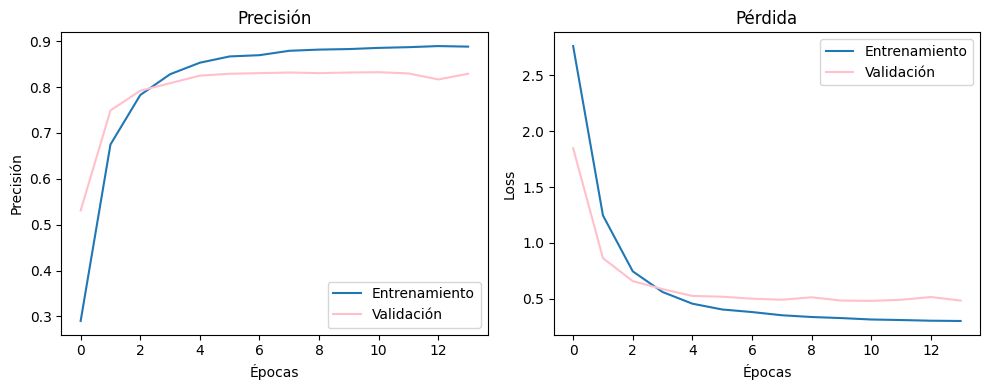

In [28]:
# Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación', color = 'pink')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación', color = 'pink')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Usamos los datos de X_test para graficar las 3 principales metricas de cada caso

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

<Figure size 1400x600 with 0 Axes>

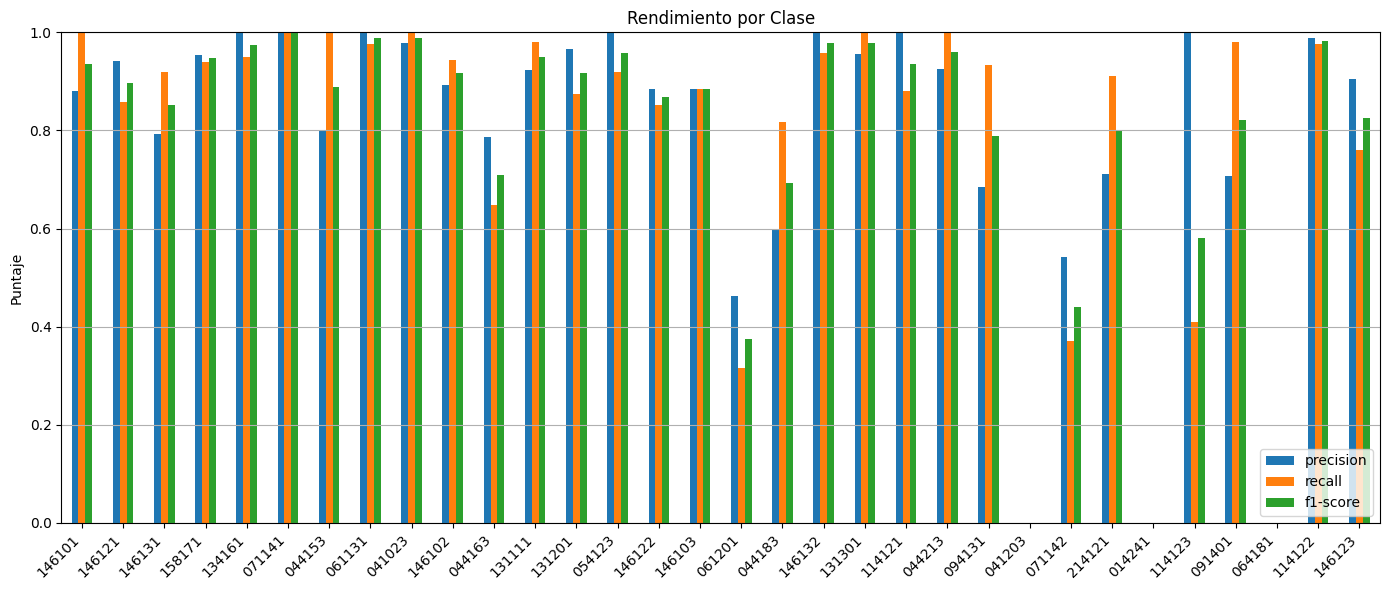

In [29]:
# Predecir sobre el set de prueba
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Generar el reporte de clasificación como diccionario
report = classification_report(y_test, y_pred, target_names=grdFiltro, output_dict=True)

# Convertir a DataFrame para graficar
df_report = pd.DataFrame(report).transpose()

# Filtrar solo las clases (descartar avg/total)
df_classes = df_report.iloc[:-3][['precision', 'recall', 'f1-score']]

# Graficar
plt.figure(figsize=(14, 6))
df_classes.plot(kind='bar', figsize=(14, 6))
plt.title('Rendimiento por Clase')
plt.ylabel('Puntaje')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Curva ROC del modelo para ver desempeño de cada clase a predecir

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


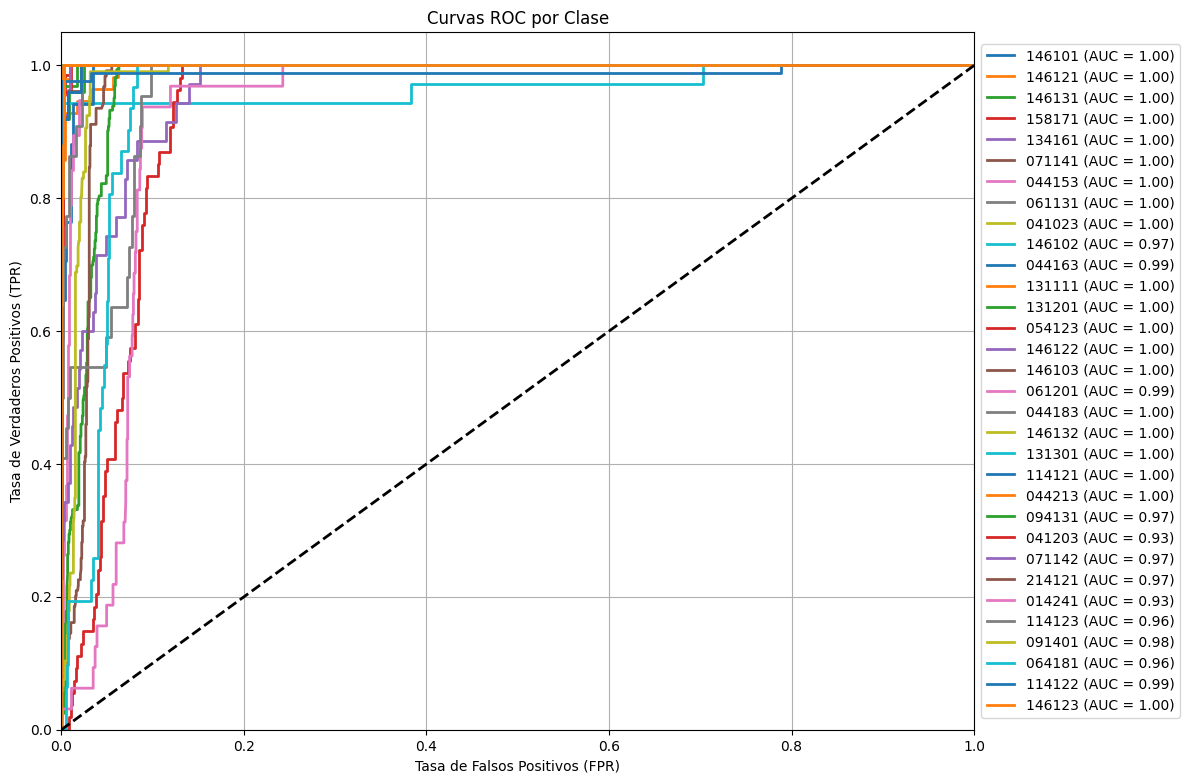

In [30]:
# Asegurar que y_test esté en formato one-hot
y_test_bin = label_binarize(y_test, classes=range(len(grdFiltro)))

# Obtener predicciones de probabilidad del modelo
y_score = model.predict(X_test)

# Inicializar el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada clase
for i in range(len(grdFiltro)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{grdFiltro[i]} (AUC = {roc_auc:.2f})')

# Línea diagonal (random)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Clase')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()


Matriz de confusión con diagonal bien marcada para los TP

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


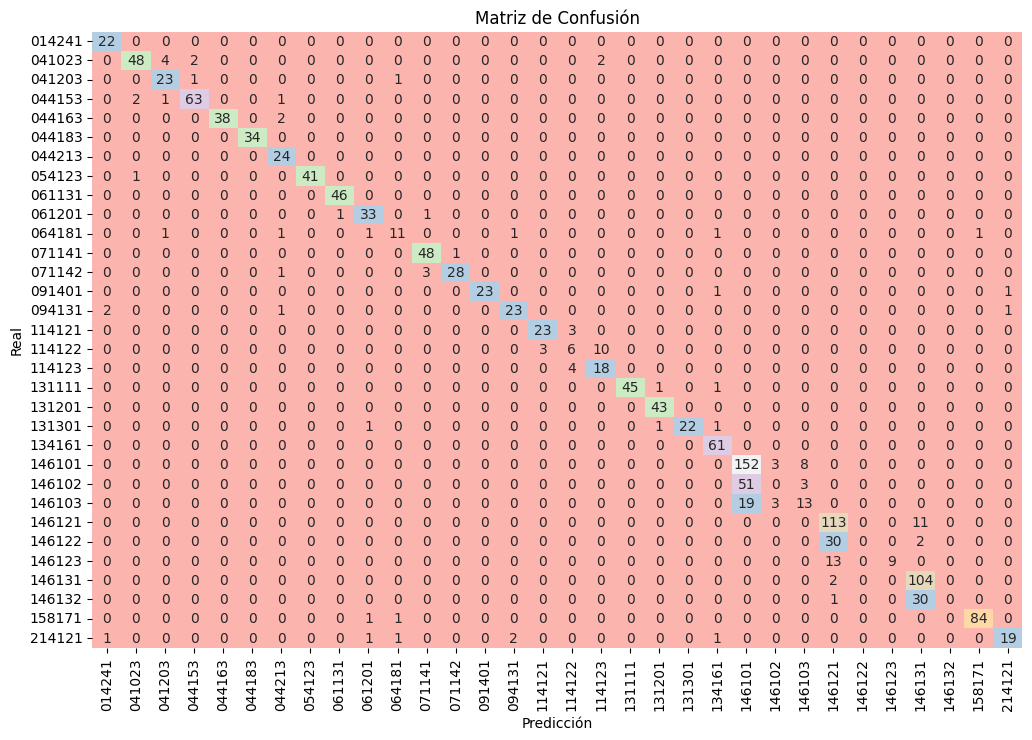

In [ ]:
# Obtener las predicciones
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Convertir probabilidades a clase

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor con seaborn
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=le.classes_, yticklabels=le.classes_, cbar=False)

# Etiquetas y título
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()



Generar datos aleatorios a partir de nuestro df 'data' para probar el modelo

In [ ]:
# Tomamos una muestra aleatoria de 10 filas
sample_data = data.sample(n=10, random_state=42)

# Ahora procesamos los datos para prepararlos para el LSTM
token_rows_sample = []

# Mismo proceso de tokenización para los datos de la muestra
for i, row in sample_data.iterrows():
    token_row = []
    # 1. Añadir Diag01 (principal)
    token_row.append(1 + token_diagnosticos.index(row["Diag01"]))
    # 2. Añadir resto de diagnósticos (secundarios)
    for j in range(2, 36):
        field = f"Diag{str(j).zfill(2)}"
        token_row.append(1 + token_diagnosticos.index(row[field]) if row[field] in token_diagnosticos else 0)
    # 3. Añadir Proced01 (principal)
    token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(row["Proced01"]))
    # 4. Añadir resto de procedimientos (secundarios)
    for j in range(2, 31):
        field = f"Proced{str(j).zfill(2)}"
        token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(row[field]) if row[field] in token_procedimientos else 0)

    token_row.append(row["Edad"])
    token_row.append(1 if row["Sexo"] == "M" else 0)  # Asumir 0/1 para género, ajusta si es necesario
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])

    token_rows_sample.append(token_row)

# Convertir a numpy array para el modelo
X_sample = np.array(token_rows_sample)

# Reshape para el LSTM, donde 1 es el número de timesteps
X_sample = X_sample  # 1 timestep


# Asegúrate de que tu y_sample también está en formato one-hot
y_sample = pd.get_dummies(sample_data["GRD"]).values

# Ver los datos de entrada para asegurarte que la tokenización y forma están correctas
print("Datos de entrada (X_sample):", X_sample)
print("Etiquetas de salida (y_sample):", y_sample)

# Ahora puedes pasar estos datos al modelo LSTM para hacer predicciones
y_pred_sample = model.predict(X_sample)

# Ver las predicciones
print("Predicciones para la muestra:", y_pred_sample)


Datos de entrada (X_sample): [[ 299  317  592  300  157  158  159  160  161  734   20   20   20   20
    20   20   20   20   20   20   20   20   20   20   20   20   20   20
    20   20   20   20   20   20   20 2414 2353 2334 2332 2333 2297 2269
  2242 2268 2335 2298 2228 2240 2300 2283 2234 2285 2285 2285 2285 2285
  2285 2285 2285 2285 2285 2285 2285 2285 2285   30    0   10   16]
 [ 330 1141   20   20   20   20   20   20   20   20   20   20   20   20
    20   20   20   20   20   20   20   20   20   20   20   20   20   20
    20   20   20   20   20   20   20 2273 2208 2234 2238 2285 2285 2285
  2285 2285 2285 2285 2285 2285 2285 2285 2285 2285 2285 2285 2285 2285
  2285 2285 2285 2285 2285 2285 2285 2285 2285    3    0    2    4]
 [ 321   20   20   20   20   20   20   20   20   20   20   20   20   20
    20   20   20   20   20   20   20   20   20   20   20   20   20   20
    20   20   20   20   20   20   20 2234 2285 2285 2285 2285 2285 2285
  2285 2285 2285 2285 2285 2285 2285 2285 2

In [35]:
sample_data

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD,num_diag,num_proc
5262,O70.1,O63.1,O81.3,O99.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,Z87.5,...,,,,,,30,1,146121,10,16
3109,S06.20,W20.09,,,,,,,,,...,,,,,,3,0,014241,2,4
5741,Z76.2,,,,,,,,,,...,,,,,,0,1,158171,1,1
12283,J13,J12.3,J96.09,Y95,B95.3,U07.1,N17.9,N13.3,I48.0,I50.9,...,93.82,93.09,93.05,93.04,93.17,70,0,041023,16,30
6011,O69.3,O34.2,O82.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,Z27.1,,...,,,,,,26,1,146101,9,12
4877,O99.8,N20.0,O99.3,F17.2,,,,,,,...,,,,,,33,1,134161,4,8
5450,O34.2,O82.0,O99.2,E66.9,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,,...,,,,,,28,1,146101,9,9
2956,J96.09,J80,J15.1,J14,E46,J90,A16.2,J94.8,J44.1,J43.2,...,93.13,93.19,93.22,93.99,93.09,60,0,041023,12,30
7955,U07.1,J12.8,R05,R06.0,M79.19,R50.9,Z01.7,Z29.0,J96.09,J96.19,...,99.23,99.29,93.12,93.14,93.27,67,1,044153,35,30
3818,E66.8,R73.0,K76.0,,,,,,,,...,,,,,,34,1,061201,3,17


Grafico que muestra la probabilidad de pertenecer a cada clase de las 10 muestras

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


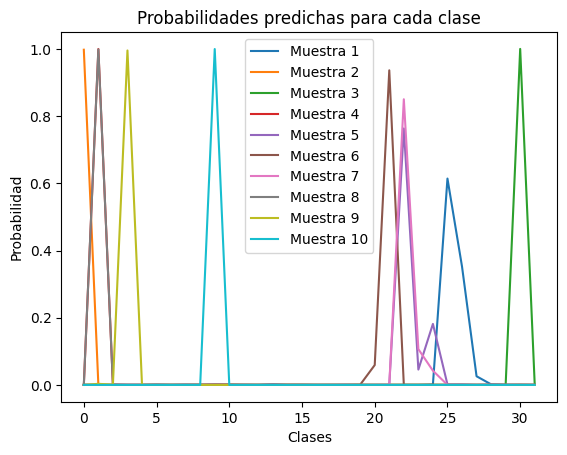

In [ ]:
# Realizar la predicción (las probabilidades de las clases)
y_pred_sample = model.predict(X_sample)

# Graficar las probabilidades para cada clase
for i in range(len(y_pred_sample)):
    plt.plot(np.arange(len(y_pred_sample[i])), y_pred_sample[i], label=f"Muestra {i+1}")

plt.title("Probabilidades predichas para cada clase")
plt.xlabel("Clases")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()



Datos inventados para probar el modelo

In [ ]:
# Parto múltiple y Parto único espontáneo, presentación cefálica de vértice, Parto con fórceps bajo
diagnosticos = ['O84', 'O80', 'O81.0']

# AMNIOCENTESIS DIAGNOSTICA, INCISION CERVIX ASISTENCIA PARTO, INDUCCION MEDICA PARTO, PARTO ASISTIDO MANUALMENTE
procedimientos = ['75.1', '73.93', '73.4', '73.5']

edad = 35
sexo = 0
# Crear diccionario de datos
datos = {}

# Rellenar los primeros diagnósticos
for i in range(1, 4):  # Solo los dos primeros relevantes
    datos[f'Diag{i:02d}'] = diagnosticos[i-1]

# Rellenar el resto de diagnósticos con padding
for i in range(4, 36):
    datos[f'Diag{i:02d}'] = ''

# Rellenar los primeros procedimientos
for i in range(1, 5):
    datos[f'Proced{i:02d}'] = procedimientos[i-1]

# Rellenar el resto de procedimientos
for i in range(5, 31):
    datos[f'Proced{i:02d}'] = ''

# Crear el DataFrame
df_prueba = pd.DataFrame([datos])

In [350]:
data_prueba = df_prueba

In [351]:
data_prueba['Edad'] = edad
data_prueba['Sexo'] = sexo
data_prueba['num_diag'] = data_prueba[diag_cols].apply(lambda row: row[(row != '')].count(), axis=1)
data_prueba['num_proc'] = data_prueba[proc_cols].apply(lambda row: row[(row != '')].count(), axis=1)
data_prueba

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,num_diag,num_proc
0,S84,A80,S81.0,,,,,,,,...,,,,,,,35,1,3,4


In [352]:
# Crear el diccionario de mapeo si no lo tienes
token_diagnosticos_dict = {token: idx for idx, token in enumerate(token_diagnosticos)}
token_procedimientos_dict = {token: idx for idx, token in enumerate(token_procedimientos)}
# Mapear diagnóstico
for col in [f'Diag{i:02d}' for i in range(1, 36)]:
    df_prueba[col] = df_prueba[col].map(lambda x: token_diagnosticos_dict.get(x, 0))

# Mapear procedimiento
for col in [f'Proced{i:02d}' for i in range(1, 31)]:
    df_prueba[col] = df_prueba[col].map(lambda x: token_procedimientos_dict.get(x, 0))


Probar el modelo con el caso particular

In [353]:
# 3. Unir todo en un único array
x_prueba = df_prueba.values  # Esto te da un (1, 69)

# 4. Predecir
prediccion = model.predict(x_prueba)

# 5. Interpretar
pred_clase = np.argmax(prediccion, axis=1)

print(f"Índice predicho: {pred_clase}")
print(f"GRD predicho: {grdFiltro[pred_clase[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Índice predicho: [2]
GRD predicho: 146131
